Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Read the column description and ensure you understand each attribute well Study the data distribution in each attribute, share your findings. (5 points)

Get the target column distribution. Your comments
Split the data into training and test set in the ratio of 70:30 respectively
Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)

Print the confusion matrix for all the above models (5 points)
 
 7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

Dataset:Bank_Personal_Loan_Modelling.csvView in a new window

Please note: Since going forward, you will be pushing all your assessment files to the same repository for the remainder of the program, so it is important that you follow some name structure to identify your assessment submission properly.

Please name your file in the following format - CourseName_ResidencyNumber_ProjectNo_Title.ipynb

For Ex - Supervised Learning_R4_Project2_Thera Bank.ipynb
Github link: https://classroom.github.com/a/WSWMHTtW (Links to an external site.)Links to an external site.Links to an external site.

In [1]:
# Import required library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.cross_validation import cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Read the required data
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

### GET the feel of the data with the help of descriptive Stats and EDA

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [6]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [7]:
df.groupby(["Personal Loan"]).size()

Personal Loan
0    4520
1     480
dtype: int64

### print(df.groupby(["Family"]).size()/len(df["Family"])*100, "\n")
print(df.groupby(["Education"]).size()/len(df["Education"])*100, "\n")
print(df.groupby(["Personal Loan"]).size()/len(df["Personal Loan"])*100, "\n")
print(df.groupby(["Securities Account"]).size()/len(df["Securities Account"])*100, "\n")
print(df.groupby(["CD Account"]).size()/len(df["CD Account"])*100, "\n")
print(df.groupby(["Online"]).size()/len(df["Online"])*100, "\n")
print(df.groupby(["CreditCard"]).size()/len(df["CreditCard"])*100, "\n")


## Deep Dive into Data 
 
### Column descriptions - on viewing the data 
ID - is the customer ID - This is not required for the model predection
Age- Customer Age 
Experience - # of years
Income - Income of the customer (in Thousands shoud be USD based on Zipcode)
ZIP Code - Address details of the customer 
Family -  # of members in the family.
CCAvg - Credit Card Spend per month
Education - 1. Under Graduate 2. Graduate 3. Post Graduate
Mortgage- Existing mortgate value
Personal Loan - our Y value - did customer accept the Personal Loan in our previous campaign 
Securities , CD account, Online and Credit card - These are  Boolean information which is security account CD account, online internet banking and credit card


### Categorical feature:

#### ordinal:
-Family
-Education

#### nominal:
-ID
-Zip Code
-Securities Account
-CD Account
-Online
-Credit Card

#### Numerical feature:
Interval or Ratio:    
-Age
-Experience
-Income
-CCAvg
-Mortage


There are negative values in the Experience which is 


### Working on the incorrect details in the data set 


In [8]:
pd.DataFrame(df[df["Experience"]<0][["Age","Experience"]].sort_values("Age"))

#The data sets seems like -  Experience is captured wrongly for the members with the AGE between 23 to 29 
# we will deep dive to understand how to impute them 

,Age,Experience
2717,23,-2
3130,23,-2
3425,23,-1
2962,23,-2
909,23,-1
3824,23,-1
4411,23,-2
4285,23,-3
3157,23,-1
2618,23,-3


In [9]:
pd.DataFrame(df[df["Age"]<29][["Age","Experience"]].sort_values("Age"))["Experience"].unique()

array([-2, -1, -3,  0,  1,  2,  3,  4], dtype=int64)

In [10]:
pd.DataFrame(df.groupby("Education").mean()["Experience"])

,Experience
Education,
1,20.065363
2,19.770492
3,20.471686


In [11]:
pd.DataFrame(df.groupby("Age").mean()["Experience"]).head(8)

,Experience
Age,
23,-1.666667
24,-1.071429
25,-0.018868
26,0.961538
27,1.923077
28,2.961165
29,3.715447
30,4.860294


# Replacing the experience with the Absolute value as the information is not too very different from the range value of the experience in relation with the age 

In [12]:
df['Experience'] = df['Experience'].abs()

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [14]:
feature = df.drop(["ID","Personal Loan"],axis=1)
feature_contData = df.drop(["ID","Personal Loan","CreditCard","Online","CD Account", "Securities Account","ZIP Code","Education","Family" ], axis =1)
target = df["Personal Loan"]

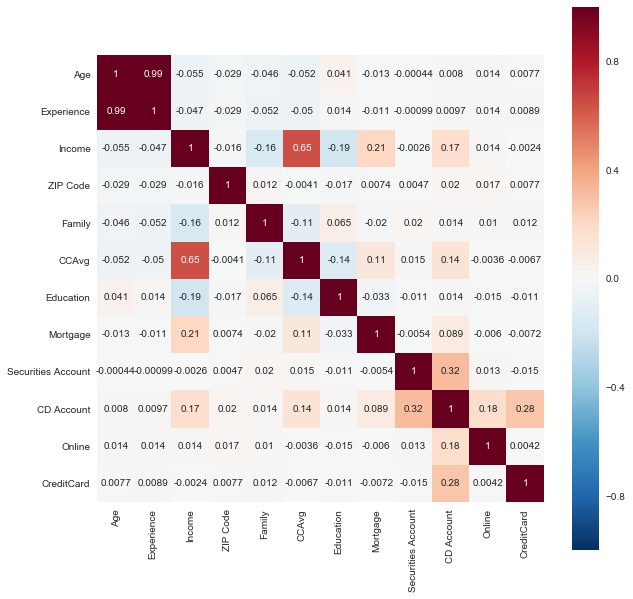

In [15]:
corr = feature.corr()

#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(corr ,annot=True,square=True)

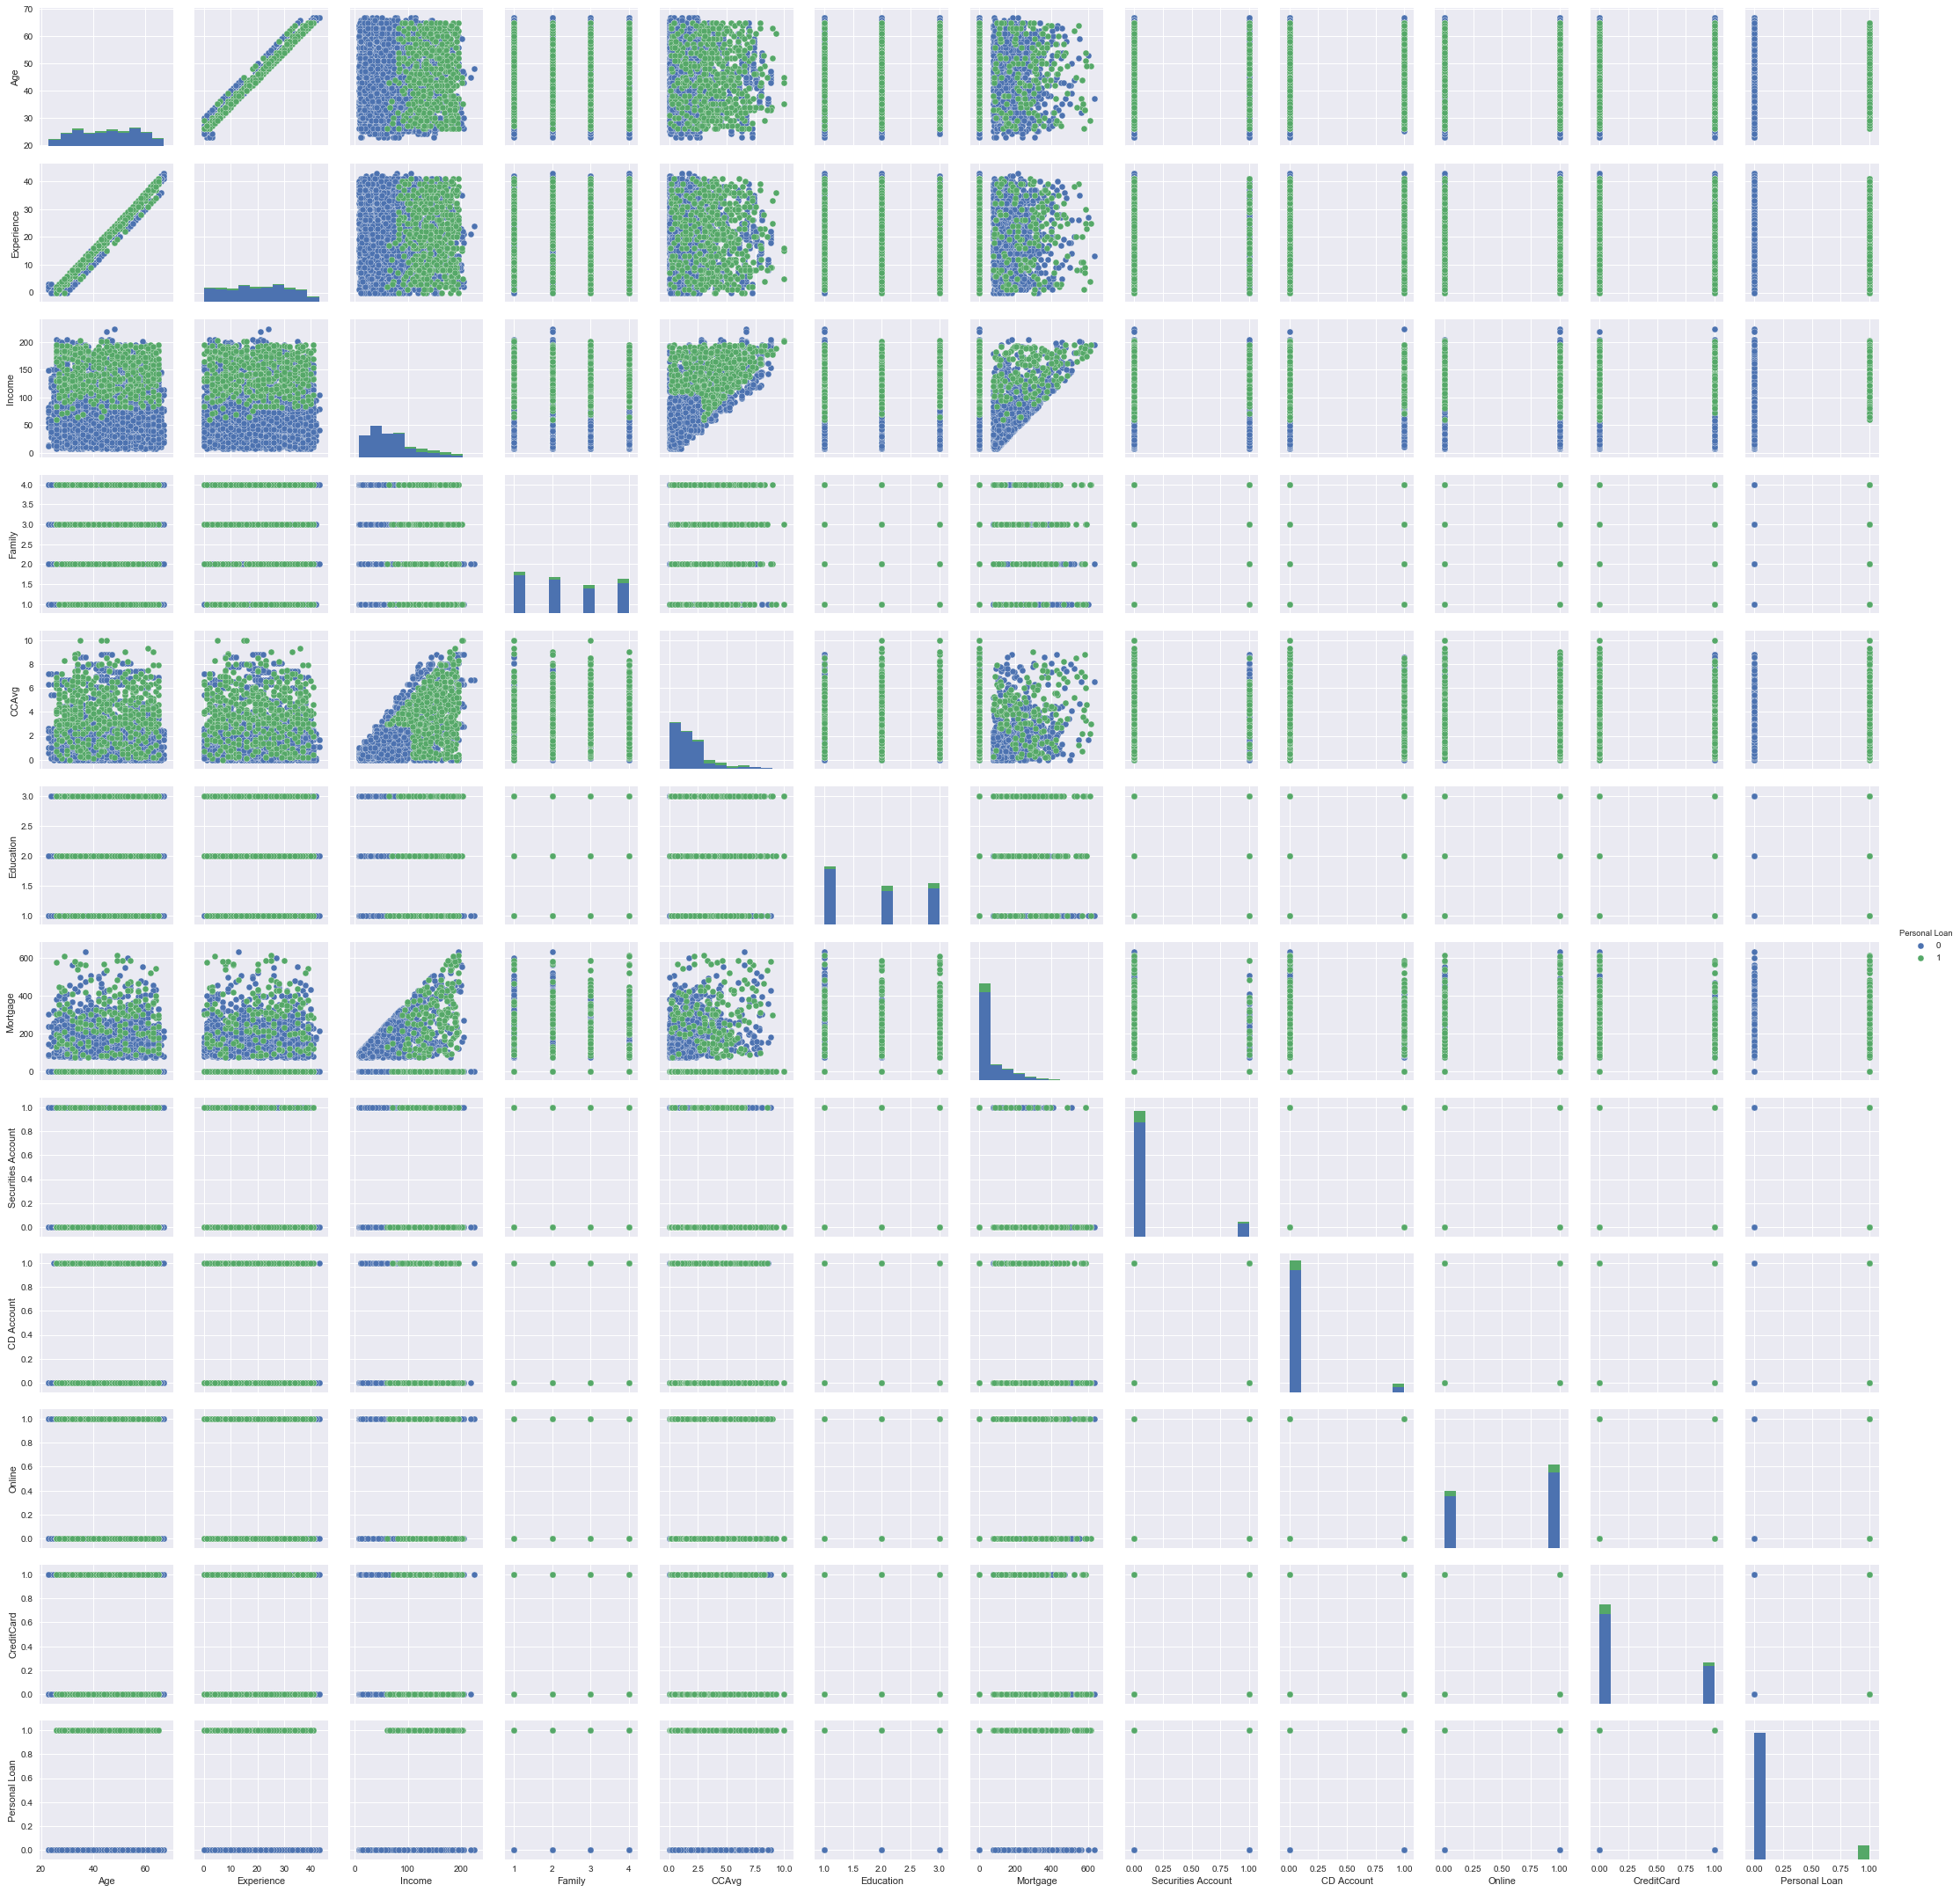

In [16]:
plt.figure(figsize=(20, 20))
sns.pairplot(feature.join(target).drop(["ZIP Code"],axis=1),hue="Personal Loan")

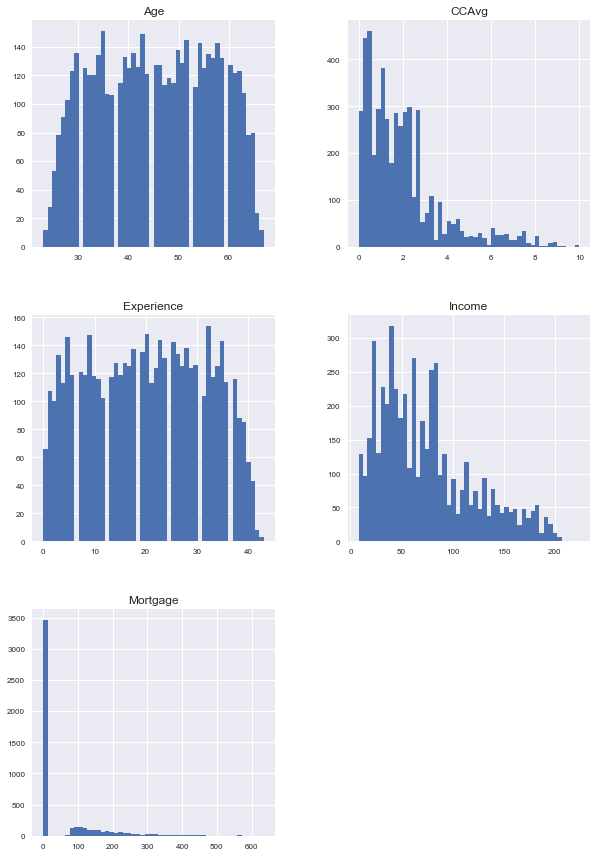

In [17]:
feature_contData.hist(figsize=(10,15),bins = 50,xlabelsize=8,ylabelsize =8,)
plt.show()

In [18]:
# Mortgage neeed to be analyze more ; with the histograme we find there are difference in distribution 
# the histogram is not showing much of info as the data spread is high therefore convert it to log normal 

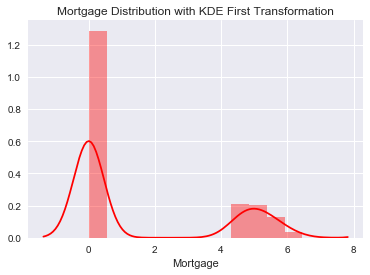

In [19]:
SingleLog_y = np.log1p(feature["Mortgage"])              # Log transformation of the target variable
sns.distplot(SingleLog_y, color ="r")
plt.title("Mortgage Distribution with KDE First Transformation")

In Mortgage there is a gausian mixture whereas the value for one of the record is only 0
 
 
 performing bivariate analysis to understand the how features are explaining the Target.

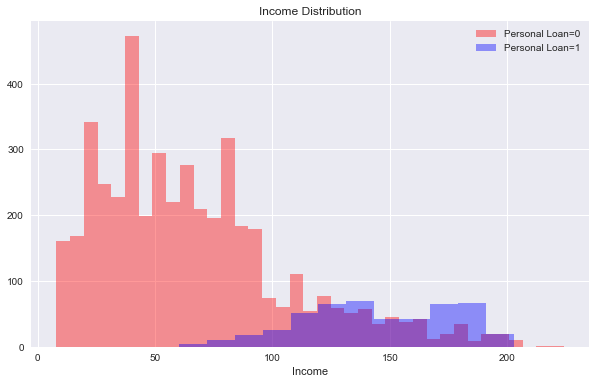

In [20]:
plt.figure(figsize=(10,6))
sns.distplot(df[df["Personal Loan"] == 0]['Income'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(df[df["Personal Loan"] == 1]['Income'], color = 'b',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("Income Distribution")

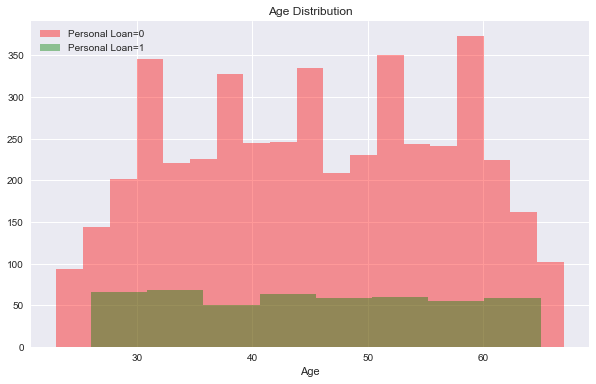

In [22]:

plt.figure(figsize=(10,6))
sns.distplot(df[df["Personal Loan"] == 0]['Age'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(df[df["Personal Loan"] == 1]['Age'], color = 'g',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("Age Distribution")

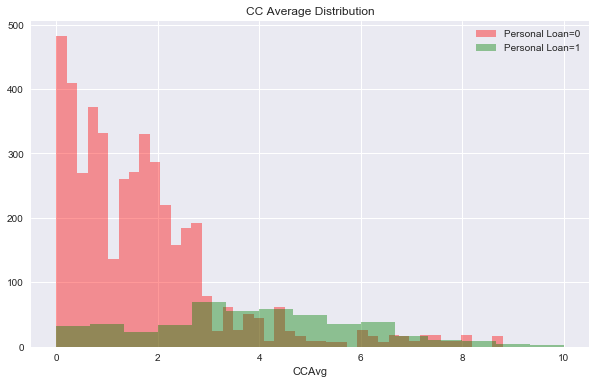

In [23]:
plt.figure(figsize=(10,6))
sns.distplot(df[df["Personal Loan"] == 0]['CCAvg'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(df[df["Personal Loan"] == 1]['CCAvg'], color = 'g',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("CC Average Distribution")

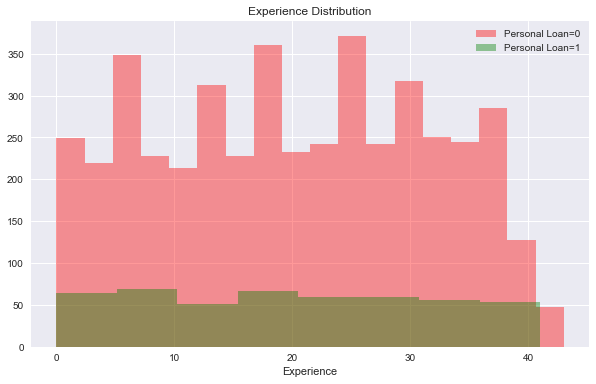

In [24]:
plt.figure(figsize=(10,6))
sns.distplot(df[df["Personal Loan"] == 0]['Experience'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(df[df["Personal Loan"] == 1]['Experience'], color = 'g',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("Experience Distribution")

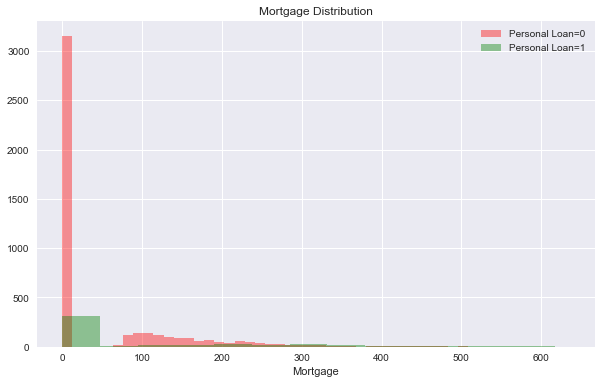

In [25]:
plt.figure(figsize=(10,6))
sns.distplot(df[df["Personal Loan"] == 0]['Mortgage'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(df[df["Personal Loan"] == 1]['Mortgage'], color = 'g',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("Mortgage Distribution")

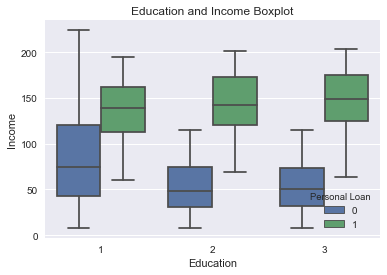

In [26]:
sns.boxplot(x='Education',data=df,hue='Personal Loan',y='Income')
plt.title("Education and Income Boxplot")

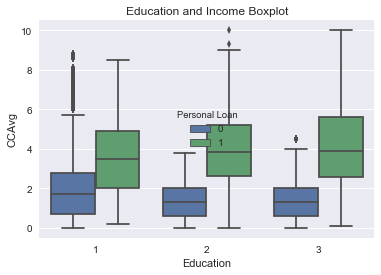

In [27]:
sns.boxplot(x='Education',data=df,hue='Personal Loan',y='CCAvg')
plt.title("Education and Income Boxplot")

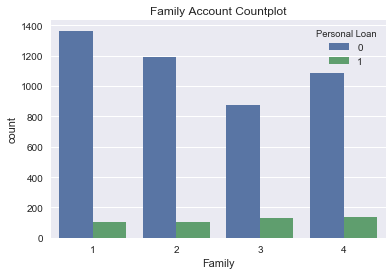

In [28]:
sns.countplot(x='Family',data=df,hue='Personal Loan')
plt.title("Family Account Countplot")

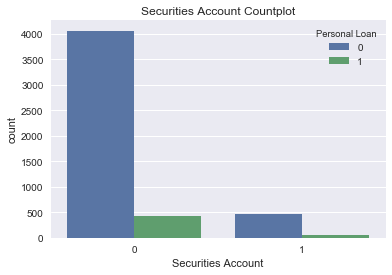

In [29]:
sns.countplot(x='Securities Account',data=df,hue='Personal Loan')
plt.title("Securities Account Countplot")

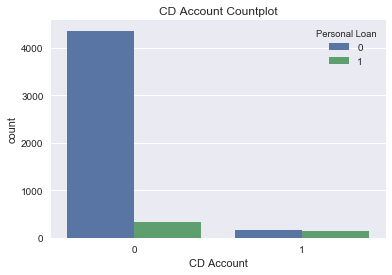

In [30]:
sns.countplot(x='CD Account',data=df,hue='Personal Loan')
plt.title("CD Account Countplot")

# Inference from above analysis
As the income increases the probability of the taking loan is high as per the above. 
Age seems not contributing much to the prediction 
CC average is a good continuting factor 

where as in on verifying relation ship witn bivariate analysis we find he income and education explains most of the informtion.

CC usage with education level 1 got many outleirs where the loan has not been consumed. Thats part of the process variation. 

CC usage with educaion level 2 where loan has been provided also got some outliers. Thats part of process variation

People who dosent have Security account and CD account are not opting for the loan therefore these calues can be considered for the analysis.


Based on the above analysis we will remove the features like "ID", "ZIP Code","Age","Online","CreditCard" which are not explaining the model 

features like "income", "CCAverage", "Education", "Family", "Experience","CD account", "Security account" and "mortgage" explains the model better. 


# Split the data and preparing the model 

In [31]:
feature = feature.drop(["ZIP Code","Age","Online","CreditCard"],axis=1)

In [35]:
feature.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account
0,1,49,4,1.6,1,0,1,0
1,19,34,3,1.5,1,0,1,0
2,15,11,1,1.0,1,0,0,0
3,9,100,1,2.7,2,0,0,0
4,8,45,4,1.0,2,0,0,0


In [33]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size = 0.3)


# Building a Logistic Regression model

In [34]:

lr = LogisticRegression()
model = lr.fit(x_train,y_train)

In [36]:
print("Logistic Regression Score on the train data is - ", lr.score(x_train,y_train))

Logistic Regression Score on the train data is -  0.9468571428571428


In [37]:
predict = lr.predict(x_test.values)


In [38]:
print("Logistic Regression Score on the Test data is - ",lr.score(x_test,y_test))

Logistic Regression Score on the Test data is -  0.9513333333333334


# Evaluation

             precision    recall  f1-score   support

          0       0.96      0.99      0.97      1349
          1       0.87      0.61      0.72       151

avg / total       0.95      0.95      0.95      1500



array([[1335,   14],
       [  59,   92]])

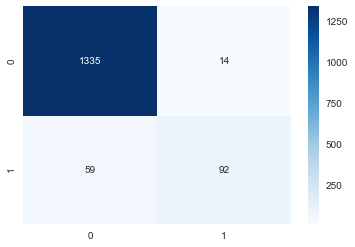

In [57]:

print(classification_report(y_test,predict))
confusion_matrix(y_test,predict)
sns.heatmap(confusion_matrix(y_test,predict), annot=True, cmap='Blues',fmt='g')
confusion_matrix(y_test,predict)



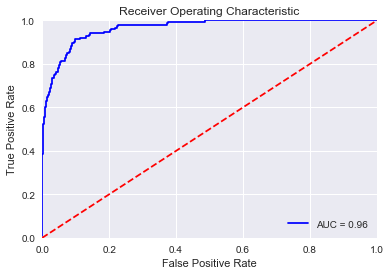

In [40]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [41]:
# Necessary imports: for a k fold cross validation


In [42]:
# Perform 10-fold cross validation
scores = cross_val_score(model, x_test, y_test, cv=10)
print('Cross-validated scores:', scores)

Cross-validated scores: [0.92715232 0.92666667 0.94       0.95333333 0.96666667 0.94
 0.94666667 0.96       0.94       0.93959732]


In [43]:
predictions = cross_val_predict(model, x_test, y_test, cv=10)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1349
          1       0.83      0.56      0.67       151

avg / total       0.94      0.94      0.94      1500



In [44]:
#Logistic, K-NN and Naïve Bayes

# Building a KNN model

In [45]:
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'uniform', metric='euclidean')

In [46]:
NNH.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [47]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(x_test)

In [48]:

print(confusion_matrix(y_test,predicted_labels))
print(classification_report(y_test, predicted_labels))

[[1312   37]
 [  89   62]]
             precision    recall  f1-score   support

          0       0.94      0.97      0.95      1349
          1       0.63      0.41      0.50       151

avg / total       0.91      0.92      0.91      1500



In [53]:
from sklearn.grid_search import GridSearchCV

k = np.arange(1,51)
knn = KNeighborsClassifier()
parameters = {'n_neighbors': k}
GS = GridSearchCV(knn,parameters,cv=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [55]:
GS.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [56]:
GS.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Building a Naive Bayesian

In [49]:

# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB(priors=None)

In [50]:
# make predictions
expected = y_test
predicted = model.predict(x_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       0.95      0.91      0.93      1349
          1       0.41      0.59      0.49       151

avg / total       0.90      0.87      0.88      1500

[[1222  127]
 [  62   89]]


In [51]:

# Perform 10-fold cross validation
scores = cross_val_score(model, x_test, y_test, cv=10)
print('Cross-validated scores:', scores)

Cross-validated scores: [0.88741722 0.9        0.84666667 0.86666667 0.90666667 0.89333333
 0.88666667 0.89333333 0.89333333 0.87919463]


In [52]:
predictions = cross_val_predict(model, x_test, y_test, cv=10)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.95      0.92      0.93      1349
          1       0.45      0.60      0.51       151

avg / total       0.90      0.89      0.89      1500



# Inference

From the above three models exeuted Logistic Regression seems to be good precision and recall.


## Logistic Regression model

array([[1335,   14],
       [  59,   92]])

                precision    recall  f1-score   support

          0       0.96      0.99      0.97      1349
          1       0.87      0.61      0.72       151

avg / total       0.95      0.95      0.95      1500


## KNN


[[1312   37]
 [  89   62]]
                 precision    recall  f1-score   support

          0       0.94      0.97      0.95      1349
          1       0.63      0.41      0.50       151

avg / total       0.91      0.92      0.91      1500


## Naive Bayesian

[[1222  127]
 [  62   89]]
 
              precision    recall  f1-score   support

          0       0.95      0.91      0.93      1349
          1       0.41      0.59      0.49       151

avg / total       0.90      0.87      0.88      1500